In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import os
import sys
sys.path.insert(1, '/home/cem/Documents/implicit_scene/LLFF')
sys.path.insert(1, '/home/cem/Documents/implicit_scene/nerf_pl')
sys.path.insert(1, '/home/cem/Desktop/ov-workspace/src')


from llff.poses.pose_utils import load_colmap_data

import numpy as np
import matplotlib.pyplot as plt

from imps.cam_utils import cams2nerf
from imps.data_utils import load_colmap_poses, load_ov_cams, load_colmap_poses_bounds, load_ov_poses_bounds
from imps.vis import CameraPoseVisualizer

DATA_DIR = '/home/cem/Desktop/ov-workspace/data/ov-v3'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
colmap_poses_bounds = load_colmap_poses_bounds(DATA_DIR, transposed_rot=False)
colmap_poses = colmap_poses_bounds[:, :-2].reshape(-1, 3, 5)

Cameras 5
Images # 96
Points (26017, 3) Visibility (26017, 96)
Depth stats 0.11425793061809168 105.8574979259575 5.746784778375583


In [22]:
ov_poses_bounds = load_ov_poses_bounds(DATA_DIR, 1, 8, transpose_rot=False)
ov_poses = ov_poses_bounds[:, :-2].reshape(-1, 3, 5)

<IPython.core.display.Javascript object>


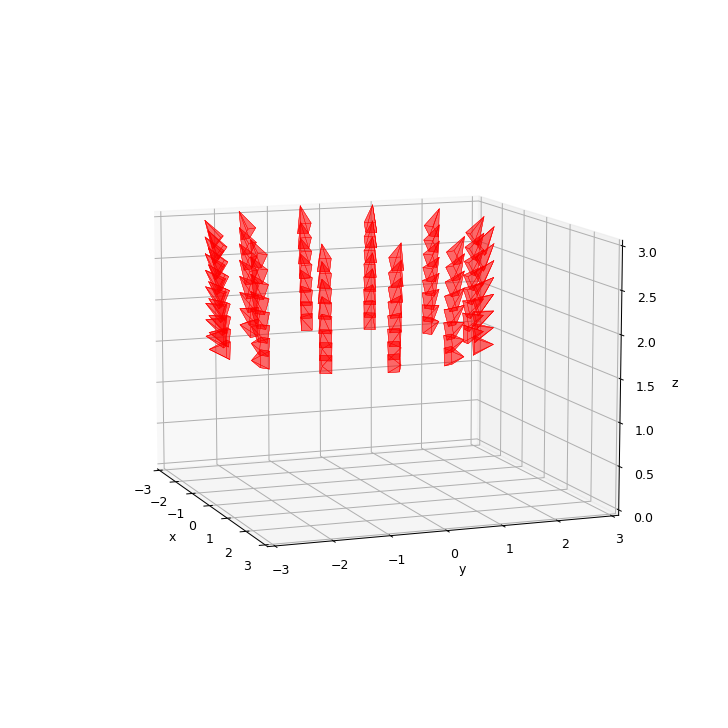

In [23]:
cp_vis = CameraPoseVisualizer([-3, 3], [-3, 3], [0, 3])

for i in range(ov_poses.shape[0]):
    pose = ov_poses[i, :, :-1]
    pose = np.concatenate((pose, np.array([[0,0,0,1]])), axis=0)
    cp_vis.extrinsic2pyramid(pose, focal_len_scaled=0.35)

<IPython.core.display.Javascript object>


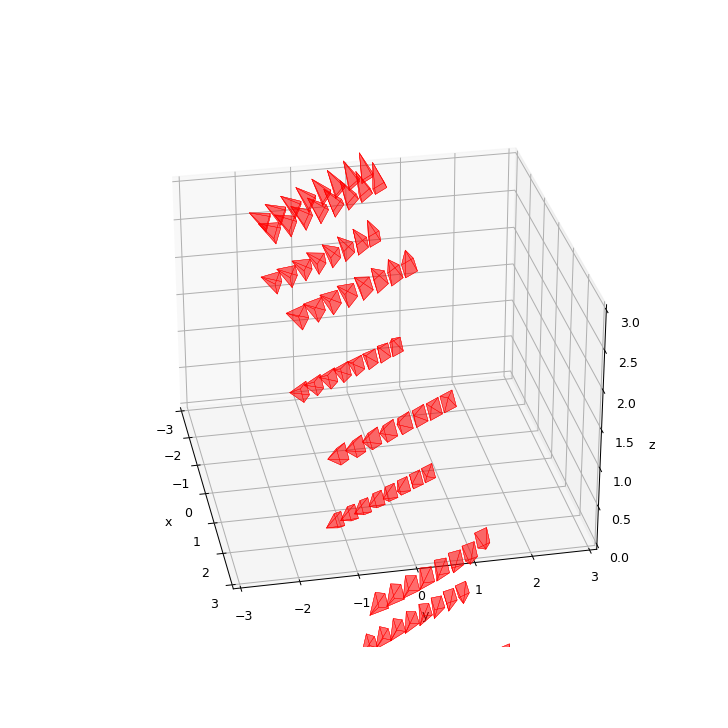

In [26]:
cp_vis = CameraPoseVisualizer([-3, 3], [-3, 3], [0, 3])

for i in range(colmap_poses.shape[0]):
    pose = colmap_poses[i, :, :-1]
    pose = np.concatenate((pose, np.array([[0,0,0,1]])), axis=0)
    cp_vis.extrinsic2pyramid(pose, focal_len_scaled=0.35)

**IMPORTANT**  
COLMAP sorts wrt. strings not integer frame ids.

In [ ]:
bounds_colmap.max()

In [ ]:
frame_name = lambda x: f"frame.{x}.png"
frame_names = list(map(frame_name, range(len(cameras))))
perm = np.argsort(frame_names)

poses_bounds = np.load('/home/cem/Desktop/ov-workspace/script/data/ov-v1/poses_bounds_colmap.npy')
bounds_colmap = poses_bounds[:, -2:]

In [ ]:
near_original = bounds_colmap.min()
scale_factor = near_original*0.75 # 0.75 is the default parameter
                                          # the nearest depth is at 1/0.75=1.33
# scale_factor = 10
bounds_colmap /= scale_factor

In [ ]:
near = bounds_colmap.min()
near, min(8 * near, bounds_colmap.max())

In [ ]:
# bounds = np.copy(poses_bounds[:, -2:])
nf = np.array([1, 8])
bounds = np.repeat(nf[None, :], len(cameras), axis=0)

nerf_pose_bounds = cams2nerf(cameras, 720, 1280, bounds, perm=perm)
np.save(os.path.join(DATA_DIR, 'poses_bounds_gt.npy'), nerf_pose_bounds)

In [ ]:
from pyquaternion import Quaternion
KNOWN_CP_DIR = '/home/cem/Desktop/ov-workspace/script/data/ov-v1-known-cp'

In [ ]:
with open(os.path.join(KNOWN_CP_DIR, 'sparse/0/images.txt'), 'w') as file:
    for i, idx in enumerate(perm):
        cam_t = cameras[idx].w2c

        q = Quaternion(matrix=cam_t)
        img_q = [q.w, q.x, q.y, q.z, cam_t[0, -1], cam_t[1, -1], cam_t[2, -1]]
        q_str = " ".join(map(lambda x: "{:.5f}".format(x), img_q))
        line = f"{i+1} {q_str} {idx} {frame_names[idx]} \n\n"

        file.write(line)
        
with open(os.path.join(KNOWN_CP_DIR, 'sparse/0/cameras.txt'), 'w') as file:
    for i, cam in enumerate(cameras):
        line = f"{i} SIMPLE_PINHOLE 1280 720 {cam.focal_px(1280)} {1280/2} {720/2} \n"
        file.write(line)

with open(os.path.join(KNOWN_CP_DIR, 'sparse/0/points3D.txt'), 'w') as file:
    pass

In [ ]:
np.argsort(frame_names)